# generate seudo data

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import eigvalsh, inv, matrix_rank, pinv

# import packages
from fixedeffect.iv import iv2sls, ivgmm,ivtest
from fixedeffect.fe import fixedeffect, did,getfe
from fixedeffect.utils.panel_dgp import gen_data,gen_data_causal_engine 
from fixedeffect.utils.DemeanDataframe import demean_dataframe,demean_dataframe_two_cat

N = 100
T = 10
beta = [-3,1,2,3,4]
ate = 1
exp_date = 5


# generate unbalance panel data
df = gen_data_causal_engine(N = 100,
                           T = 10,
                           beta = [-3,1,1.5,2,2.5,3],
                           alpha = 0.9,
                           ate = 1,
                           exp_date = 3,
                           b_unbalance = True,
                           unbalance_frac = 0.5)
 

# fixedeffect
## check if getfe() function return dummy variables coefficient

In [3]:
df_2 = df.copy()

df_2['time'] = df_2['time'].apply(str)
df_2['id']   = df_2['id'].apply(str)
df_2 = df_2.join(pd.get_dummies(df_2[['id','time']], prefix=['id','time']))

y = ['y']
exog_x = ['x_1']
exog_time = ['time_date_01', 'time_date_02', 'time_date_03',
             'time_date_04', 'time_date_05', 'time_date_06', 'time_date_07',
             'time_date_08', 'time_date_09', 'time_date_10']

exog_x_id = [ 'id_1.0','id_10.0','id_100.0','id_11.0','id_12.0','id_13.0','id_14.0','id_15.0','id_16.0','id_17.0',
             'id_18.0','id_19.0','id_2.0','id_20.0','id_21.0','id_22.0','id_23.0','id_24.0','id_25.0','id_26.0',
             'id_27.0','id_28.0','id_29.0','id_3.0','id_30.0','id_31.0','id_32.0','id_33.0','id_34.0','id_35.0',
             'id_36.0','id_37.0','id_38.0','id_39.0','id_4.0','id_40.0','id_41.0','id_42.0','id_43.0','id_44.0',
             'id_45.0','id_46.0','id_47.0','id_48.0','id_49.0','id_5.0','id_50.0','id_51.0','id_52.0','id_53.0',
             'id_54.0','id_55.0','id_56.0','id_57.0','id_58.0','id_59.0','id_6.0','id_60.0','id_61.0','id_62.0',
             'id_63.0','id_64.0','id_65.0','id_66.0','id_67.0','id_68.0','id_69.0','id_7.0','id_70.0','id_71.0',
             'id_72.0','id_73.0','id_74.0','id_75.0','id_76.0','id_77.0','id_78.0','id_79.0','id_8.0','id_80.0',
             'id_81.0','id_82.0','id_83.0','id_84.0','id_85.0','id_86.0','id_87.0','id_88.0','id_89.0','id_9.0',
             'id_90.0','id_91.0','id_92.0','id_93.0','id_94.0','id_95.0','id_96.0','id_97.0','id_98.0','id_99.0',]
#category = ['id']
category = []

model_fe = fixedeffect(data_df = df_2,
                      dependent = y,
                      exog_x = exog_x + exog_x_id,
                      category = category, noint=True)

result = model_fe.fit()
result.summary()

                   High Dimensional Fixed Effect Regression Results                   
  Dep. Variable:               y   R-squared(proj model):                     0.4257  
  No. Observations:          500   Adj. R-squared(proj model):                0.2803  
  DoF of residual:         399.0   R-squared(full model):                     0.4257  
  Residual std err:       4.8377   Adj. R-squared(full model):                0.2803  
  Covariance Type:     nonrobust   F-statistic(proj model):                   2.9578  
  Cluster Method:     no_cluster   Prob (F-statistic (proj model)):        2.124e-14  
                                   DoF of F-test (proj model):        [100.0, 399.0]  
                                   F-statistic(full model):                   2.9285  
                                   Prob (F-statistic (full model)):        3.116e-14  
                                   DoF of F-test (full model):            [101, 399]  
                   coef nonrobust std err  

In [4]:
y = ['y']
exog_x = ['x_1']
category = ['id']

model_fe = fixedeffect(data_df = df_2,
                       dependent = y,
                       exog_x = exog_x,
                       category = category,
                       noint=True)

result = model_fe.fit()
result.summary()



                  High Dimensional Fixed Effect Regression Results                  
  Dep. Variable:               y   R-squared(proj model):                   0.0631  
  No. Observations:          500   Adj. R-squared(proj model):             -0.1717  
  DoF of residual:         399.0   R-squared(full model):                   0.4257  
  Residual std err:       4.8377   Adj. R-squared(full model):              0.4246  
  Covariance Type:     nonrobust   F-statistic(proj model):                26.8645  
  Cluster Method:     no_cluster   Prob (F-statistic (proj model)):      3.474e-07  
                                   DoF of F-test (proj model):        [1.0, 399.0]  
                                   F-statistic(full model):                 2.9285  
                                   Prob (F-statistic (full model)):      3.116e-14  
                                   DoF of F-test (full model):          [101, 399]  
                   coef nonrobust std err          t      P>|t|  

In [5]:
getfe(result)

,dummy_name,effect,s.e,t-value,P>|t|
0,id1.0,-7.115177,1.828762,-3.890707,0.000117
1,id10.0,-3.078249,2.420447,-1.271769,0.204196
2,id100.0,-1.436876,1.830042,-0.785160,0.432826
3,id11.0,-5.399794,2.418866,-2.232366,0.026145
4,id12.0,-2.658788,1.978265,-1.344000,0.179712
...,...,...,...,...,...
95,id95.0,2.733067,3.423223,0.798390,0.425119
96,id96.0,-5.703052,2.163506,-2.636023,0.008716
97,id97.0,0.471195,1.976801,0.238362,0.811723
98,id98.0,-2.339210,2.418988,-0.967020,0.334120


# iv

## iv2sls

In [6]:
formula = 'y ~ x_1|id + time|0|(x_2~x_3+x_4)'

model_iv2sls = iv2sls(data_df = df,
                      formula = formula)
result = model_iv2sls.fit()
result.summary()



dependent variable(s): ['y']
independent(exogenous): ['x_1']
category variables(fixed effects): ['id', 'time']
cluster variables: ['0']
endogenous variables: ['x_2']
instruments: ['x_3', 'x_4']
            High Dimensional Fixed Effect Regression Results           
  Dep. Variable:               y   R-squared:               -517.1963  
  No. Observations:          500   Adj. R-squared:          -519.2816  
  DoF of residual:         389.0   F-statistic:               17.9785  
  Residual std err:     114.1245   Prob (F-statistic):      3.405e-08  
  Covariance Type:     nonrobust   DoF of F-test:        [2.0, 389.0]  
  Cluster Method:     no_cluster                                       
                   coef nonrobust std err          t      P>|t|     [0.025     0.975]   
----------------------------------------------------------------------------------------
  const         5.54856           2.64057     2.1013     0.0363     0.3570    10.7401   
  x_1           6.88567           1

/Users/zhouxiaoyu/Desktop/FixedEffectModel/fixedeffect/utils/DemeanDataframe.py:30: UserWarning: panel is unbalanced
  warnings.warn('panel is unbalanced')


In [7]:
exog_x = ['x_1']
endog_x = ['x_2']
iv = ['x_3','x_4']
y = ['y']

model_iv2sls = iv2sls(data_df = df,
                      dependent = y,
                      exog_x = exog_x,
                      endog_x = endog_x,
                      category = ['id','time'],
                      iv = iv)

result = model_iv2sls.fit()
result.summary()

            High Dimensional Fixed Effect Regression Results           
  Dep. Variable:               y   R-squared:               -517.1963  
  No. Observations:          500   Adj. R-squared:          -519.2816  
  DoF of residual:         389.0   F-statistic:               17.9785  
  Residual std err:     114.1245   Prob (F-statistic):      3.405e-08  
  Covariance Type:     nonrobust   DoF of F-test:        [2.0, 389.0]  
  Cluster Method:     no_cluster                                       
                   coef nonrobust std err          t      P>|t|     [0.025     0.975]   
----------------------------------------------------------------------------------------
  const         5.54856           2.64057     2.1013     0.0363     0.3570    10.7401   
  x_1           6.88567           1.83770     3.7469     0.0002     3.2726    10.4987   
  hat_x_2    -117.82493          37.89378    -3.1093     0.0020  -192.3272   -43.3227   
             First-Stage F-stat      P > F   
-----

## ivgmm

In [8]:

formula = 'y ~ x_1|id+time|0|(x_2~x_3+x_4)'

model_ivgmm = ivgmm(data_df = df,
                    formula = formula)
result = model_ivgmm.fit()
result.summary()

dependent variable(s): ['y']
independent(exogenous): ['x_1']
category variables(fixed effects): ['id', 'time']
cluster variables: ['0']
endogenous variables: ['x_2']
instruments: ['x_3', 'x_4']
           High Dimensional Fixed Effect Regression Results          
  Dep. Variable:               y   R-squared:             -517.1963  
  No. Observations:          500   Adj. R-squared:        -516.1599  
  DoF of residual:           389   F-statistic:              0.0408  
  Residual std err:     134.3433   Prob (F-statistic):       0.9600  
  Covariance Type:     nonrobust   DoF of F-test:          [2, 389]  
  Cluster Method:     no_cluster                                     
                   coef nonrobust std err          t      P>|t|     [0.025     0.975]   
----------------------------------------------------------------------------------------
  const         5.54856          55.41574     0.1001     0.9203  -103.4033   114.5004   
  x_1           6.88567          38.56638     0.1

In [9]:
exog_x = ['x_1']
endog_x = ['x_2']
iv = ['x_3','x_4']
y = ['y']

model_ivgmm = ivgmm(data_df = df,
                      dependent = y,
                      exog_x = exog_x,
                      endog_x = endog_x,
                      category = ['id','time'],
                      iv = iv)

result = model_ivgmm.fit()
result.summary()

           High Dimensional Fixed Effect Regression Results          
  Dep. Variable:               y   R-squared:             -517.1963  
  No. Observations:          500   Adj. R-squared:        -516.1599  
  DoF of residual:           389   F-statistic:              0.0408  
  Residual std err:     134.3433   Prob (F-statistic):       0.9600  
  Covariance Type:     nonrobust   DoF of F-test:          [2, 389]  
  Cluster Method:     no_cluster                                     
                   coef nonrobust std err          t      P>|t|     [0.025     0.975]   
----------------------------------------------------------------------------------------
  const         5.54856          55.41574     0.1001     0.9203  -103.4033   114.5004   
  x_1           6.88567          38.56638     0.1785     0.8584   -68.9390    82.7103   
  x_2        -117.82493         795.24799    -0.1482     0.8823 -1681.3469  1445.6971   
             First-Stage F-stat      P > F   
-------------------

## ivtest

In [10]:
from fixedeffect.iv import ivtest

ivtest(result)

Weak IV test with critical values based on 2SLS size
  Cragg-Donald Statistics:            0.011225  
  number of instrumental variables:          2  
  number of endogenous variables:            1  
                                      5%        10%        20%        30%    
-----------------------------------------------------------------------------
2SLS Size of nominal 5% Wald test    19.9300    11.5900     8.7500     7.2500
-----------------------------------------------------------------------------
H0: Instruments are weak

     Over identification test - nonrobust     
                    test statistics  p values 
----------------------------------------------
Sargan Statistics:           0.3547     0.9494
Basmann Statistics:          0.1174     0.9897
----------------------------------------------

             Tests of endogeneity            
                   test statistics  p values 
---------------------------------------------
Durbin Statistics:         14.0663     0.

# fixedeffect

In [12]:
exog_x = ['x_1']
y = ['y']
category = ['id','time']
cluster = ['id','time']


model_fe = fixedeffect(data_df = df,
                      dependent = y,
                      exog_x = exog_x,
                      category = category,
                      cluster = cluster)

result = model_fe.fit()
result.summary()

category variable(s) is_nested in cluster variables: True
                 High Dimensional Fixed Effect Regression Results                 
  Dep. Variable:               y   R-squared(proj model):                 0.0619  
  No. Observations:          500   Adj. R-squared(proj model):           -0.2003  
  DoF of residual:         390.0   R-squared(full model):                 0.2733  
  Residual std err:       4.8496   Adj. R-squared(full model):            0.0684  
  Covariance Type:     clustered   F-statistic(proj model):              33.5444  
  Cluster Method:            cgm   Prob (F-statistic (proj model)):       0.0003  
                                   DoF of F-test (proj model):          [1.0, 9]  
                                   F-statistic(full model):               1.3301  
                                   Prob (F-statistic (full model)):       0.0260  
                                   DoF of F-test (full model):        [110, 390]  
                   coef clust

In [13]:
getfe(result)

,dummy_name,effect,s.e,t-value,P>|t|
0,id1.0,-4.481789,1.830757,-2.448052,0.014803
1,id2.0,-3.033188,1.978021,-1.533446,0.125977
2,id3.0,-2.459387,2.796372,-0.879492,0.379676
3,id4.0,4.153700,2.796630,1.485252,0.138285
4,id5.0,-4.059919,1.834546,-2.213038,0.027473
...,...,...,...,...,...
105,timedate_06,0.250912,0.700805,0.358034,0.720512
106,timedate_07,0.707517,0.631032,1.121206,0.262890
107,timedate_08,0.798303,0.685694,1.164226,0.245044
108,timedate_09,-0.133679,0.672032,-0.198918,0.842431


In [14]:
formula = 'y ~ x_1|id+time|id+time|0'

model_fe = fixedeffect(data_df = df,
                      formula = formula,no_print=True)
result = model_fe.fit()
result.summary()

                 High Dimensional Fixed Effect Regression Results                 
  Dep. Variable:               y   R-squared(proj model):                 0.0619  
  No. Observations:          500   Adj. R-squared(proj model):           -0.2003  
  DoF of residual:         390.0   R-squared(full model):                 0.2733  
  Residual std err:       4.8496   Adj. R-squared(full model):            0.0684  
  Covariance Type:     clustered   F-statistic(proj model):              33.5444  
  Cluster Method:            cgm   Prob (F-statistic (proj model)):       0.0003  
                                   DoF of F-test (proj model):          [1.0, 9]  
                                   F-statistic(full model):               1.3301  
                                   Prob (F-statistic (full model)):       0.0260  
                                   DoF of F-test (full model):        [110, 390]  
                   coef cluster std err          t      P>|t|     [0.025     0.975]   


/Users/zhouxiaoyu/Desktop/FixedEffectModel/fixedeffect/utils/DemeanDataframe.py:30: UserWarning: panel is unbalanced
  warnings.warn('panel is unbalanced')
/Users/zhouxiaoyu/Desktop/FixedEffectModel/fixedeffect/utils/ClusterErr.py:140: UserWarning: Negative eigenvalues set to zero in multi-way clustered variance matrix.
  warnings.warn('Negative eigenvalues set to zero in multi-way clustered variance matrix.')


# DID

dependent variable(s): ['y']
independent(exogenous): ['x_1']
category variables(fixed effects): ['id', 'time']
cluster variables: ['0']


/Users/zhouxiaoyu/Desktop/FixedEffectModel/fixedeffect/utils/GenCrossProd.py:55: UserWarning: You are doing DID with group effect where group is exp or base
  warnings.warn('You are doing DID with group effect where group is exp or base')


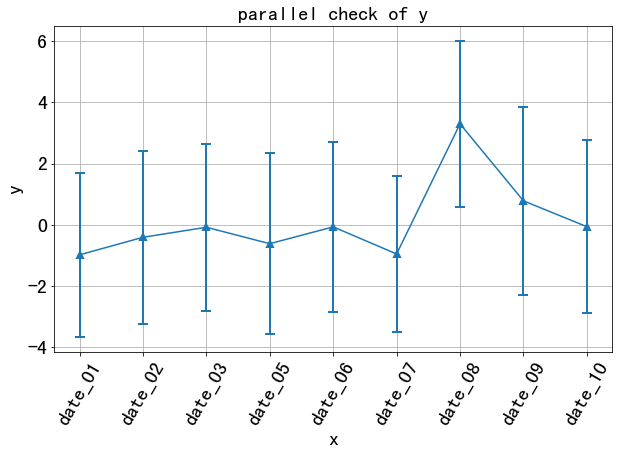

                  High Dimensional Fixed Effect Regression Results                  
  Dep. Variable:               y   R-squared(proj model):                   0.0502  
  No. Observations:          500   Adj. R-squared(proj model):             -0.2216  
  DoF of residual:         388.0   R-squared(full model):                   0.0682  
  Residual std err:       5.5058   Adj. R-squared(full model):             -0.2008  
  Covariance Type:     nonrobust   F-statistic(proj model):                 6.8324  
  Cluster Method:     no_cluster   Prob (F-statistic (proj model)):         0.0002  
                                   DoF of F-test (proj model):        [3.0, 388.0]  
                                   F-statistic(full model):                 0.2528  
                                   Prob (F-statistic (full model)):         1.0000  
                                   DoF of F-test (full model):          [112, 388]  
                                  coef nonrobust std err         

In [15]:
formula = 'y ~ x_1|0|0|0'

model_did = did(data_df = df,
                formula = formula,
                treatment = ['treatment'],
                csid = ['id'],
                tsid = ['time'],
                exp_date='date_05',
               figsize = (10,6),
               fontsize = 20)
result = model_did.fit()
result.summary()

### did等价于固定效应
did设置group_effect='treatment'等同于做了如下fix effect:
    $y_{it} = \beta_0 + \beta_1 T_i + \beta_2 T_i*post_t + date_t + e_{it}$
    
did设置group_effect='individual'等同于做了如下fix effect:
    $y_{it} = \beta_0 + \beta_2 T_i*post_t + user_i+ date_t + e_{it}$    

In [16]:
exp_date = 'date_05'
df['post'] = (df['time']>=exp_date)*1
formula = 'y ~ x_1+treatment+post*treatment|time|0|0'

model_fe1 = fixedeffect(data_df = df,
                formula = formula,
                treatment = ['treatment'],            
                exp_date='date_05')
result = model_fe1.fit()
result.summary()

dependent variable(s): ['y']
independent(exogenous): ['x_1', 'treatment', 'post*treatment']
category variables(fixed effects): ['time']
cluster variables: ['0']
                  High Dimensional Fixed Effect Regression Results                  
  Dep. Variable:               y   R-squared(proj model):                   0.0502  
  No. Observations:          500   Adj. R-squared(proj model):              0.0268  
  DoF of residual:         487.0   R-squared(full model):                   0.0682  
  Residual std err:       4.9131   Adj. R-squared(full model):              0.0433  
  Covariance Type:     nonrobust   F-statistic(proj model):                 8.5757  
  Cluster Method:     no_cluster   Prob (F-statistic (proj model)):      1.474e-05  
                                   DoF of F-test (proj model):        [3.0, 487.0]  
                                   F-statistic(full model):                 2.7357  
                                   Prob (F-statistic (full model)):       

dependent variable(s): ['y']
independent(exogenous): ['x_1']
csid: id
tsid: time
category variables(fixed effects): ['id', 'time']
cluster variables: ['0']


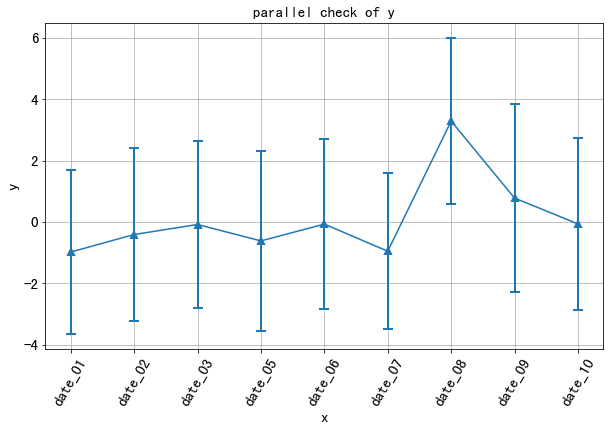

                  High Dimensional Fixed Effect Regression Results                  
  Dep. Variable:               y   R-squared(proj model):                   0.0502  
  No. Observations:          500   Adj. R-squared(proj model):             -0.2216  
  DoF of residual:         388.0   R-squared(full model):                   0.0682  
  Residual std err:       5.5058   Adj. R-squared(full model):             -0.2008  
  Covariance Type:     nonrobust   F-statistic(proj model):                 6.8324  
  Cluster Method:     no_cluster   Prob (F-statistic (proj model)):         0.0002  
                                   DoF of F-test (proj model):        [3.0, 388.0]  
                                   F-statistic(full model):                 0.2528  
                                   Prob (F-statistic (full model)):         1.0000  
                                   DoF of F-test (full model):          [112, 388]  
                                  coef nonrobust std err         

In [17]:
formula = 'y ~ x_1|id+time|0|0'

model_did = did(data_df = df,
                formula = formula,
                treatment = ['treatment'],            
                exp_date = 'date_05',
               figsize = (10,6))
result = model_did.fit()
result.summary()

In [18]:
formula = 'y ~ x_1+post*treatment|id+time|0|0'

model_fe1 = fixedeffect(data_df = df,
                formula = formula,
                treatment = ['treatment'],            
                exp_date='date_05')
result = model_fe1.fit()
result.summary()

dependent variable(s): ['y']
independent(exogenous): ['x_1', 'post*treatment']
category variables(fixed effects): ['id', 'time']
cluster variables: ['0']
                  High Dimensional Fixed Effect Regression Results                  
  Dep. Variable:               y   R-squared(proj model):                   0.0631  
  No. Observations:          500   Adj. R-squared(proj model):             -0.2018  
  DoF of residual:         389.0   R-squared(full model):                   0.2743  
  Residual std err:       4.8526   Adj. R-squared(full model):              0.0672  
  Covariance Type:     nonrobust   F-statistic(proj model):                13.1028  
  Cluster Method:     no_cluster   Prob (F-statistic (proj model)):      3.112e-06  
                                   DoF of F-test (proj model):        [2.0, 389.0]  
                                   F-statistic(full model):                 1.3212  
                                   Prob (F-statistic (full model)):         0.028

dependent variable(s): ['y']
independent(exogenous): ['x_1']
csid: id
tsid: time
category variables(fixed effects): ['id', 'time']
cluster variables: ['0']


/Users/zhouxiaoyu/Desktop/FixedEffectModel/fixedeffect/utils/GenCrossProd.py:57: UserWarning: You are doing DID with individual effect
  warnings.warn('You are doing DID with individual effect')


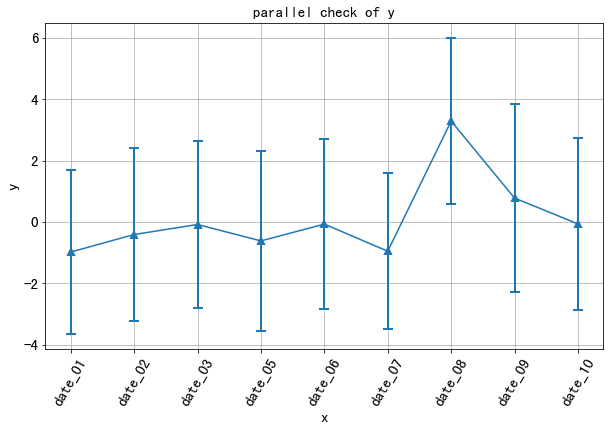

                  High Dimensional Fixed Effect Regression Results                  
  Dep. Variable:               y   R-squared(proj model):                   0.0631  
  No. Observations:          500   Adj. R-squared(proj model):             -0.2018  
  DoF of residual:         389.0   R-squared(full model):                   0.2743  
  Residual std err:       4.8526   Adj. R-squared(full model):              0.0672  
  Covariance Type:     nonrobust   F-statistic(proj model):                13.1028  
  Cluster Method:     no_cluster   Prob (F-statistic (proj model)):      3.112e-06  
                                   DoF of F-test (proj model):        [2.0, 389.0]  
                                   F-statistic(full model):                 1.3212  
                                   Prob (F-statistic (full model)):         0.0286  
                                   DoF of F-test (full model):          [111, 389]  
                                  coef nonrobust std err         

In [19]:
formula = 'y ~ x_1|id+time|0|0'

model_did = did(data_df = df,
                formula = formula,
                treatment = ['treatment'], 
                group_effect = 'individual',
                exp_date = 'date_05')
result = model_did.fit()
result.summary()

dependent variable(s): ['y']
independent(exogenous): ['x_1*x_2']
csid: id
tsid: time
category variables(fixed effects): ['id', 'time']
cluster variables: ['0']


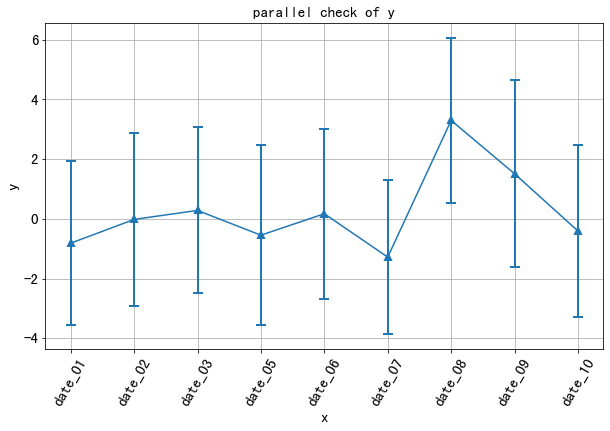

                  High Dimensional Fixed Effect Regression Results                  
  Dep. Variable:               y   R-squared(proj model):                   0.0036  
  No. Observations:          500   Adj. R-squared(proj model):             -0.2781  
  DoF of residual:         389.0   R-squared(full model):                   0.2282  
  Residual std err:       5.0043   Adj. R-squared(full model):              0.0080  
  Covariance Type:     nonrobust   F-statistic(proj model):                 0.7108  
  Cluster Method:     no_cluster   Prob (F-statistic (proj model)):         0.4919  
                                   DoF of F-test (proj model):        [2.0, 389.0]  
                                   F-statistic(full model):                 1.0337  
                                   Prob (F-statistic (full model)):         0.4027  
                                   DoF of F-test (full model):          [111, 389]  
                                  coef nonrobust std err         

In [20]:
formula = 'y ~ x_1*x_2|id+time|0|0'

model_did = did(data_df = df,
                formula = formula,
                treatment = ['treatment'], 
                group_effect='individual',
                exp_date='date_05')
result = model_did.fit()
result.summary()

# fit_multi_model

In [21]:

from fixedeffect.multi_model import fit_multi_model

models = [model_iv2sls, model_fe, model_did]
fit_multi_model(models)

multi                                               
const                       5.549   -2.635   -2.778 
std err                     2.6406   0.0067   0.2748
pvalue                       0.036      0.0  1.7e-21
x_1                         6.886    1.220  Nan     
std err                     1.8377   0.2106 Nan     
pvalue                     0.00021  1.4e-08 Nan     
hat_x_2                    -117.8  Nan      Nan     
std err                    37.8938 Nan      Nan     
pvalue                      0.0020 Nan      Nan     
x_1*x_2                   Nan      Nan      -0.2719 
std err                   Nan      Nan        0.2557
pvalue                    Nan      Nan          0.29
treatment*post_experiment Nan      Nan       0.5511 
std err                   Nan      Nan        1.1209
pvalue                    Nan      Nan          0.62
----------------------------------------------------
